In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

missing data check

<Axes: >

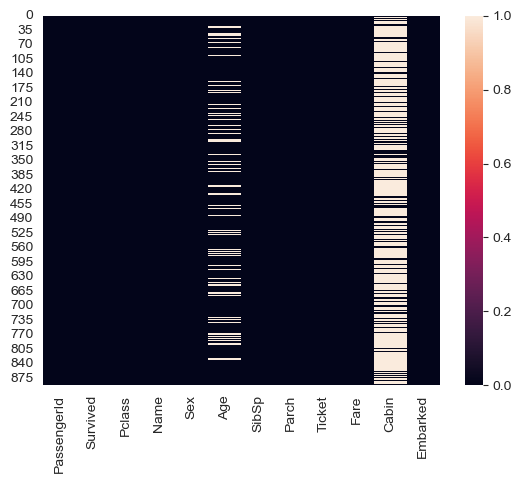

In [74]:
sns.heatmap(train.isnull())

<Axes: xlabel='Survived', ylabel='count'>

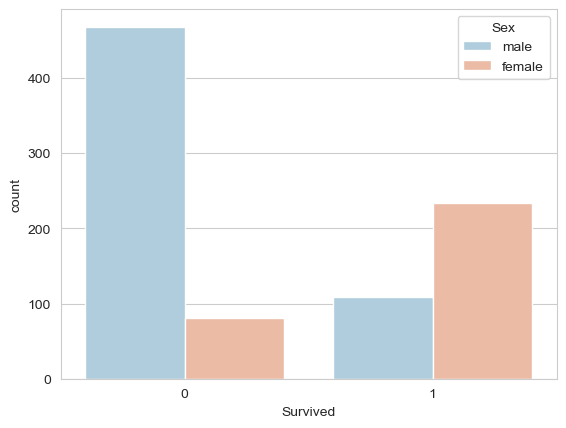

In [75]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

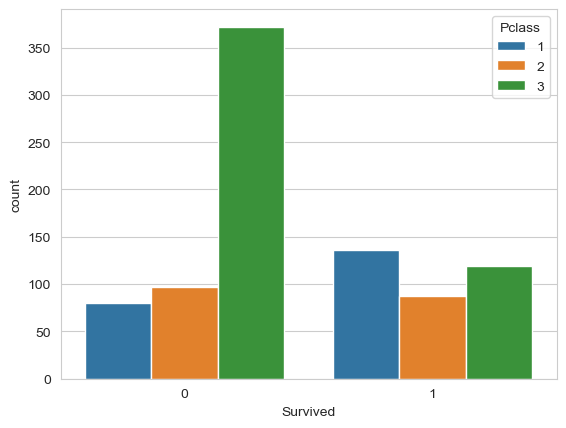

In [76]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

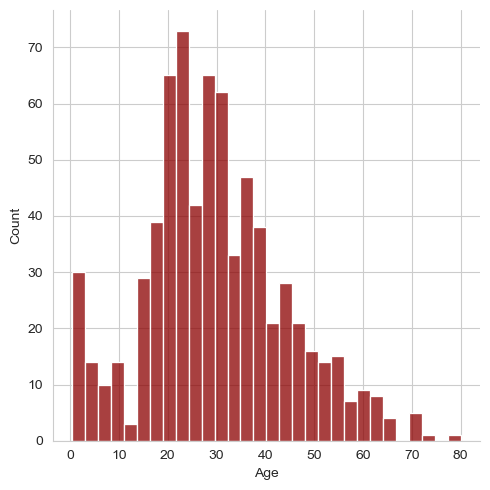

In [77]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

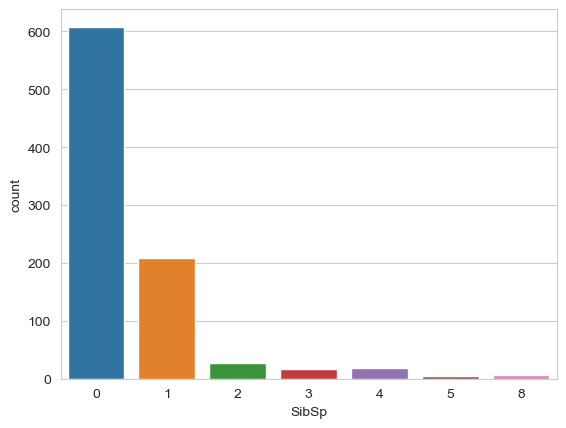

In [78]:
sns.countplot(x='SibSp',data=train)

<Axes: >

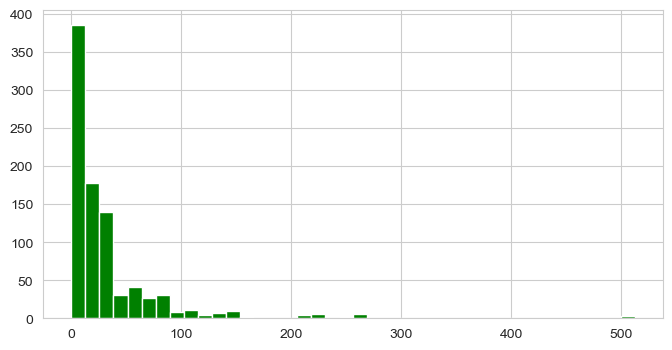

In [79]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

*DATA CLEANING*

<Axes: xlabel='Pclass', ylabel='Age'>

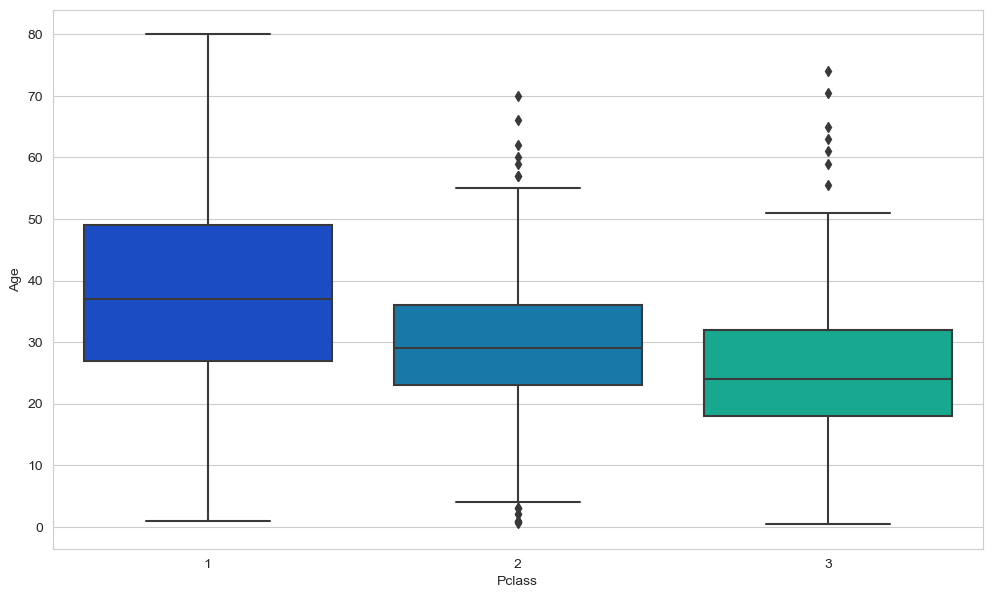

In [80]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [81]:
X = train[['Age','Pclass']]
X.groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [82]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [83]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis = 1)

<Axes: >

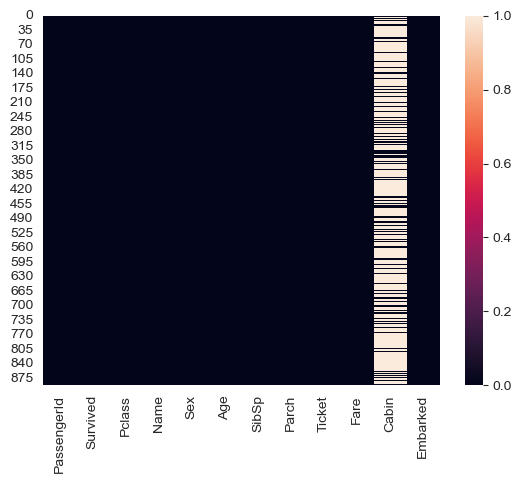

In [84]:
sns.heatmap(train.isnull())

In [85]:
train.drop('Cabin',axis = 1, inplace= True)
test.drop('Cabin',axis = 1, inplace= True)

<Axes: >

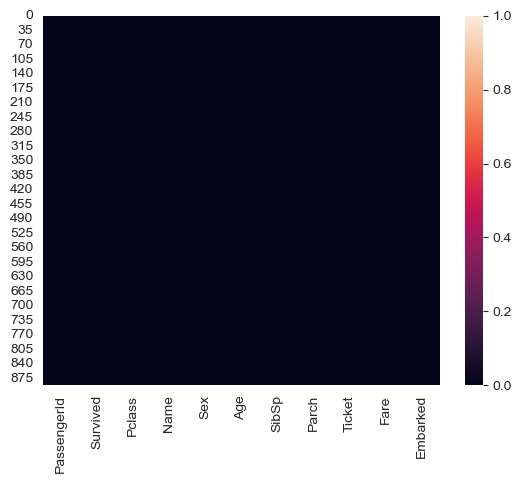

In [86]:
sns.heatmap(train.isnull())

<Axes: >

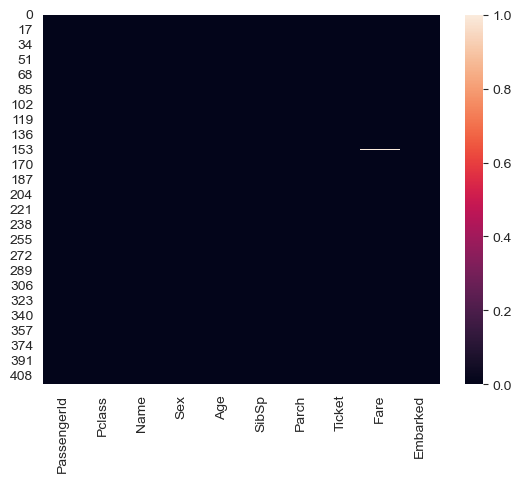

In [87]:
sns.heatmap(test.isnull())

In [88]:
test['Fare'].mean()

35.627188489208635

In [89]:
test['Fare'].fillna(value=95, inplace=True)

In [90]:
train.dropna(inplace = True)

In [91]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

*CONVERTING CATEGORICAL FEATURES*

In [92]:
sex = pd.get_dummies(train['Sex'], drop_first= True)
embark = pd.get_dummies(train['Embarked'], drop_first= True)
sex_test = pd.get_dummies(test['Sex'], drop_first= True)
embark_test = pd.get_dummies(test['Embarked'], drop_first= True)


In [93]:
train.drop(['Sex','Embarked','Ticket','Name'],axis = 1, inplace= True)
test.drop(['Sex','Embarked','Ticket','Name'],axis = 1, inplace= True)

In [94]:
train = pd.concat([train,sex,embark],axis = 1)
test = pd.concat([test,sex_test,embark_test],axis = 1)

In [95]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [96]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


**TRAIN TEST SPLIT**

In [97]:
X_train = train.drop('Survived',axis = 1)
y_train = train['Survived']
X_test = test.values

**TRAINING REGRESSION MODEL**

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/alexkhalaidzhi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
predictions = logmodel.predict(X_test)

/Users/alexkhalaidzhi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [101]:
pd.DataFrame(predictions)

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [102]:
sample_submission_df = pd.read_csv('gender_submission.csv')
sample_submission_df['Survived'] = predictions
sample_submission_df.to_csv('submission2.csv', index=False)
sample_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
